In [163]:
# Simulation result
x<-as.matrix(read.table("2.3_geno.txt"))
pheno<-as.numeric(unlist(read.table("2.3_pheno.txt")))
tbvp<-as.numeric(unlist(read.table("2.3_tbvp.txt")))

In [164]:
##load packages
library(doParallel)
library(foreach)
cl<-makeCluster(8) 
repeats <- 10
n.fold <- 5 
acc<-list()
library(rrBLUP)
packageVersion("rrBLUP") 

[1] '4.6'

In [165]:
#function for calculating the accuracy of GP with varying size of reference population
A <- A.mat(x, n.core=8)
row.names(A)=1:3000;colnames(A)=1:3000
data <- data.frame(tbcw=pheno,tbvp=tbvp,gid=1:3000) 
n.sample<-500
set.seed(100)
id<-sample(1:dim(x)[1],n.sample) 
bcw_test <- data
bcw_test$tbcw[-id] <- NA
res <- kin.blup(bcw_test, K=A, geno="gid", pheno="tbcw")

In [166]:
cor(data$tbcw[id],res$pred[id])
cor(data$tbcw[-id],res$pred[-id])

[1] 0.9215468

[1] 0.5865669

In [167]:
n.sample<-1000
set.seed(100)
id2<-sample(1:dim(x)[1],n.sample) 
bcw_test <- data
bcw_test$tbcw[-id2] <- NA
res2 <- kin.blup(bcw_test, K=A, geno="gid", pheno="tbcw")

In [168]:
cor(data$tbcw[id2],res2$pred[id2])
cor(data$tbcw[-id2],res2$pred[-id2])

[1] 0.8725218

[1] 0.6214491

In [169]:
library("ggplot2")

In [246]:
m1<-data.frame(x=data$tbcw[-id],y=res$pred[-id],id=1:2500)
m2<-data.frame(x=data$tbcw[-id2],y=res2$pred[-id2],id=1:2000)

In [242]:
r500<-ggplot(m1, aes(x=x, y=y)) + 
      geom_point(shape=20)+
      geom_smooth(method=lm,se=FALSE,color="red")+
      geom_text(x=0, y=35, label="r=0.587")+
      labs(x = "Phenotypes",y="GEBVs")+
      xlim(-10, 60)+
      ylim(0, 50)

r1000<-ggplot(m2, aes(x=x, y=y)) +
      geom_point(shape=20)+
      geom_smooth(method=lm,se=FALSE,color="red")+
      geom_text(x=0, y=35, label="r=0.621")+
      labs(x = "Phenotypes",y="GEBVs")+
      xlim(-10, 60)+
      ylim(0, 50)

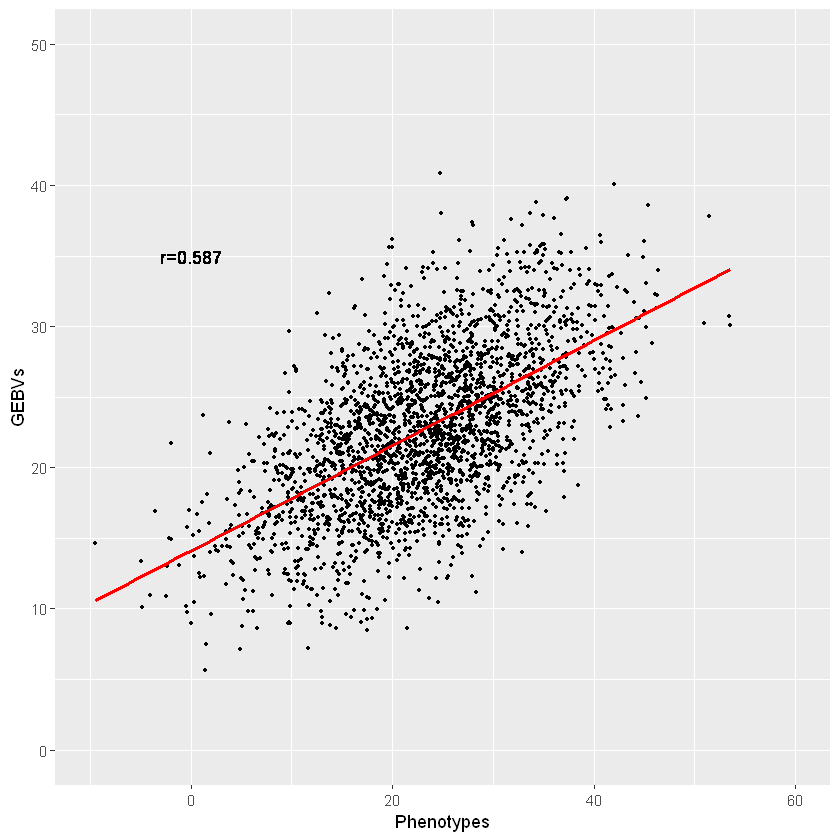

In [243]:
r500

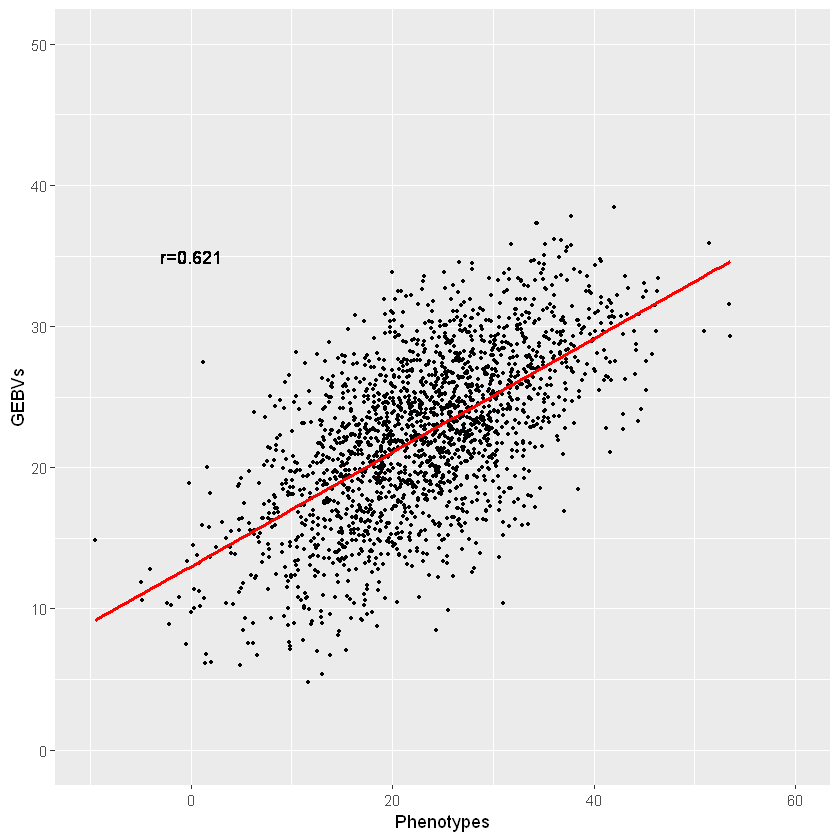

In [244]:
r1000

In [303]:
png("r500.png",width=8, height=8, units="in", res=300)
r500
dev.off()
png("r1000.png",width=8, height=8, units="in", res=300)
r1000
dev.off()

png 
  2

png 
  2

## top100 GEBV

In [296]:
str(m1)

'data.frame':	2500 obs. of  3 variables:
 $ x : num  29.5 37.1 43.3 24 18.4 ...
 $ y : num [1:2500(1d)] 32.5 23.1 32.4 17.4 22.1 ...
 $ id: int  1 2 3 4 5 6 7 8 9 10 ...


In [297]:
rownames(m1)<-1:2500
rownames(m2)<-1:2000
top50id1<-m1[order(m1$y,decreasing = TRUE),]$id[1:100]
top50id2<-m2[order(m2$y,decreasing = TRUE),]$id[1:100]
topm1<-data.frame(x=m1$x[top50id1],y=m1$y[top50id1])
topm2<-data.frame(x=m2$x[top50id2],y=m2$y[top50id2])

In [298]:
mean(topm1$x)
mean(topm2$x)

[1] 32.81111

[1] 33.81126

In [299]:
mean(topm1$y)
sd(topm1$y)
mean(topm2$y)
sd(topm2$y)

[1] 34.99708

[1] 1.739444

[1] 33.32954

[1] 1.509446